<a href="https://colab.research.google.com/github/ajaythakur3369/LetsGrowMore-Internship/blob/main/Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Terrorism Analysis**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - LetsGrowMore**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/LetsGrowMore-Internship)**

## **Importing all necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# Access the Drive from Colab to access the required file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/LetsGrowMore/File_Name/Terrorism_dataset.csv', encoding = 'latin1')

## **Understanding the dataset**

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include = [np.number])

# Compute correlation
correlation_matrix = numeric_df.corr()

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                      

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
df.duplicated().sum()

0

## **Renaming and selecting the relevant columns**

In [ ]:
df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','city': 'City', 'latitude':'Latitude', 'longitude':'Longitude', 'attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive'}, inplace=True)


In [ ]:
df = df[['Year','Month','Day','Region','Country','State','City','Latitude','Longitude','Attack_Type','Killed','Wounded','Target','Summary','Group','Target_Type','Weapon_Type','Motive']]


## **Handling missing values**

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

In [ ]:
df.head()

,Year,Month,Day,Region,Country,State,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,North America,Mexico,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Southeast Asia,Philippines,Tarlac,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Western Europe,Greece,Attica,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,East Asia,Japan,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## **Exploratory Data Analysis (EDA)**

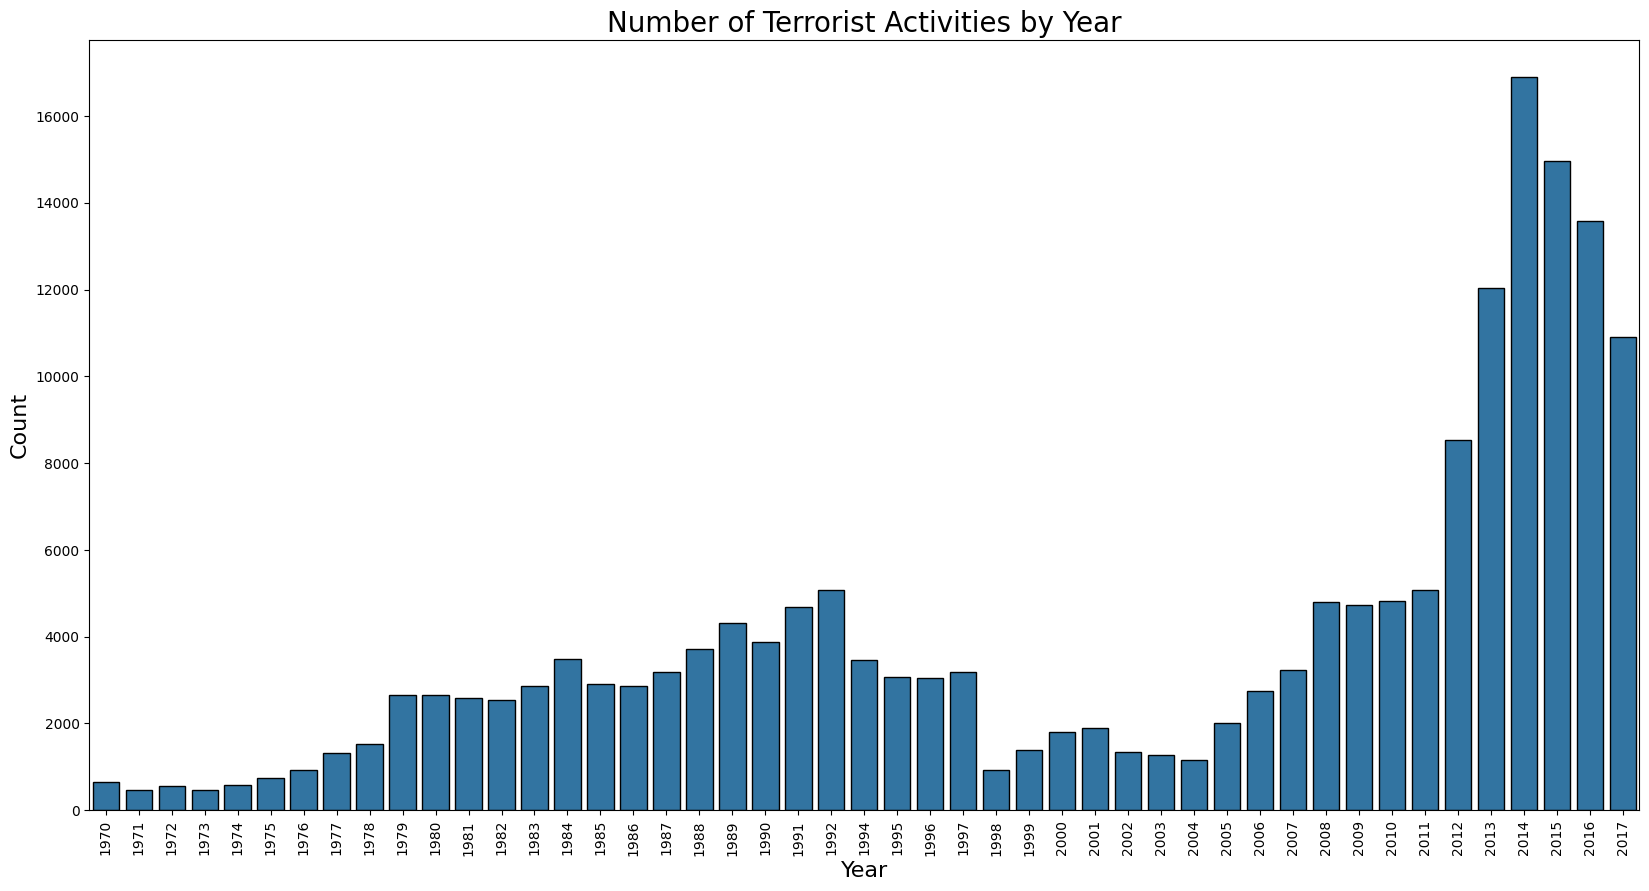

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Year', data = df, edgecolor = 'black')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Activities by Year', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

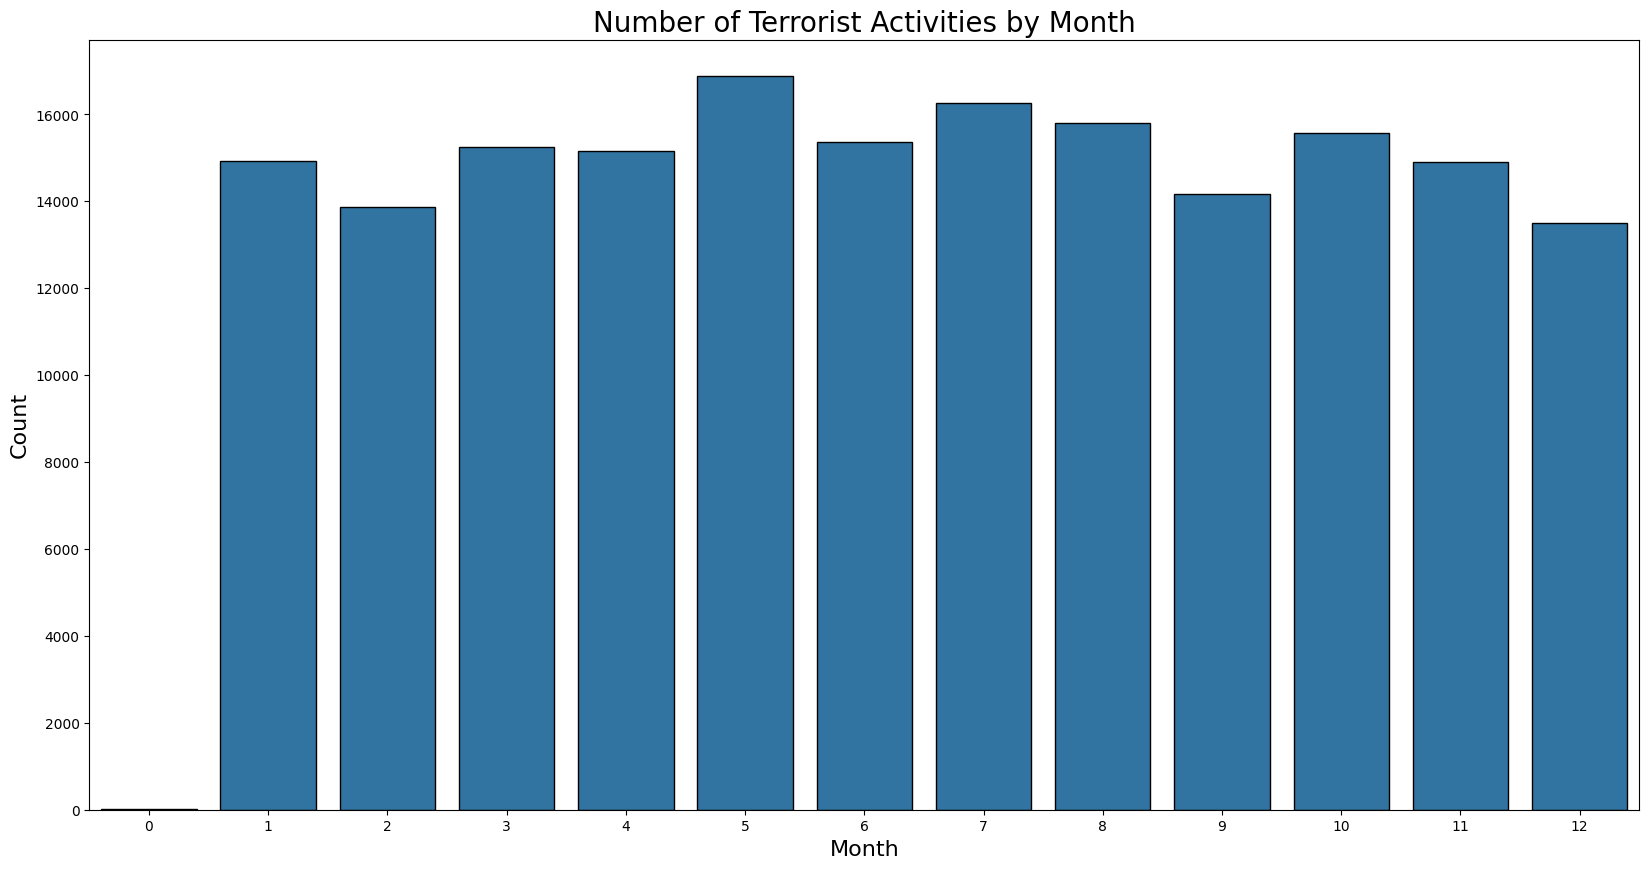

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Month', data = df, edgecolor = 'black')
plt.title('Number of Terrorist Activities by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

The distribution of terrorist activities is fairly even across all months, although May reports the highest number of terrorist activities.

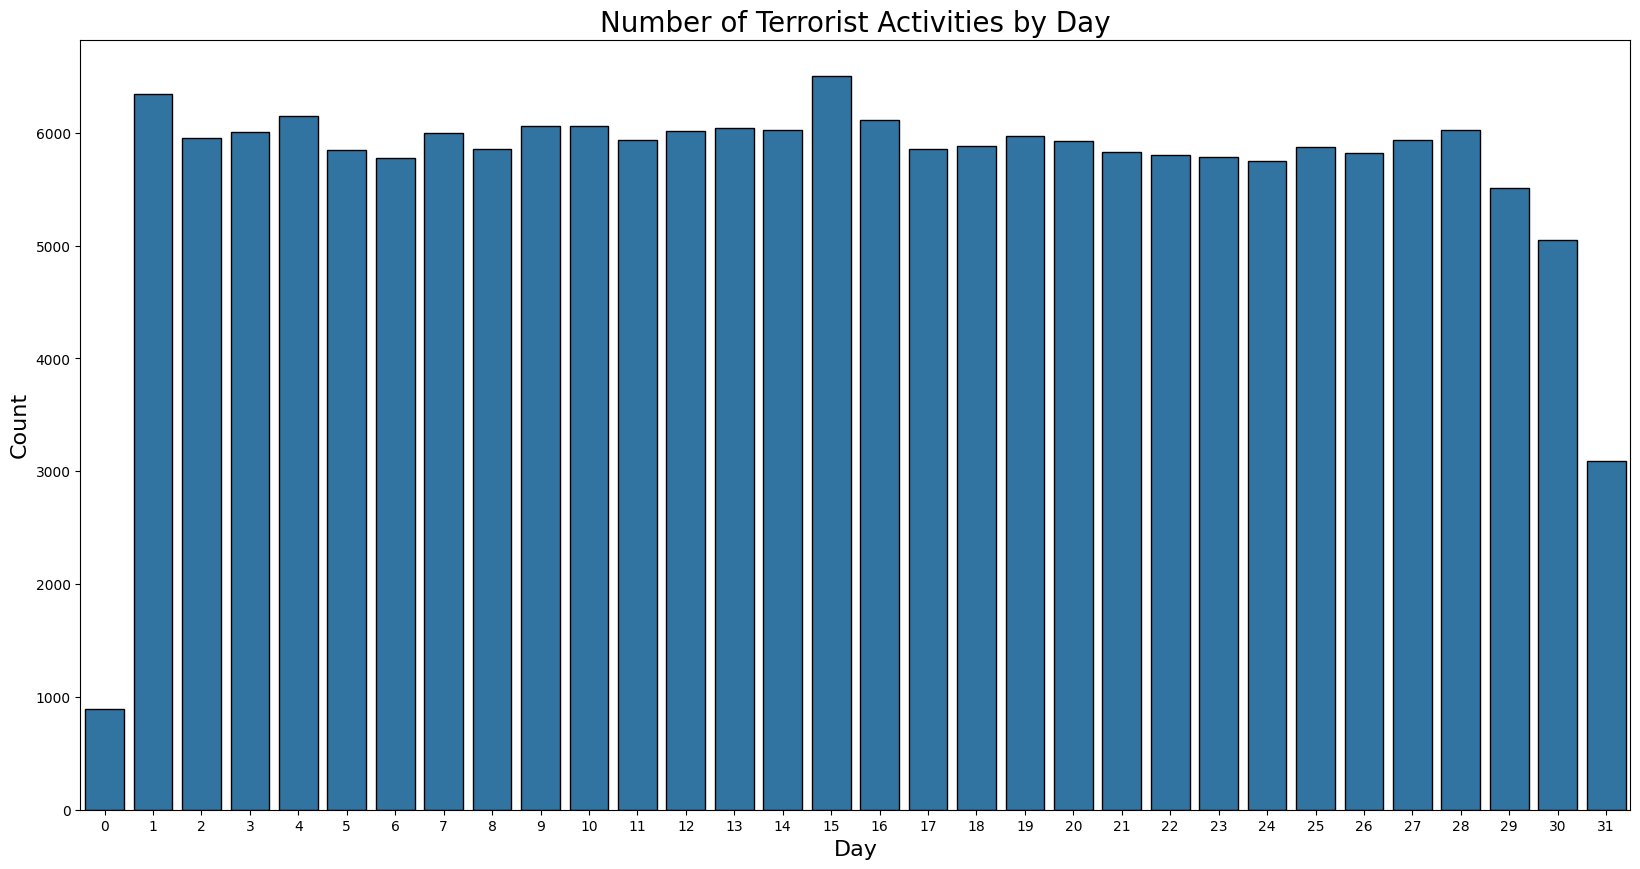

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Day', data = df, edgecolor = 'black')
plt.title('Number of Terrorist Activities by Day', fontsize = 20)
plt.xlabel('Day', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

The distribution is fairly even across all days except for the 31st, likely due to the fact that not every month has 31 days. It is observed that the most terrorist activities are reported on the 15th of a month.

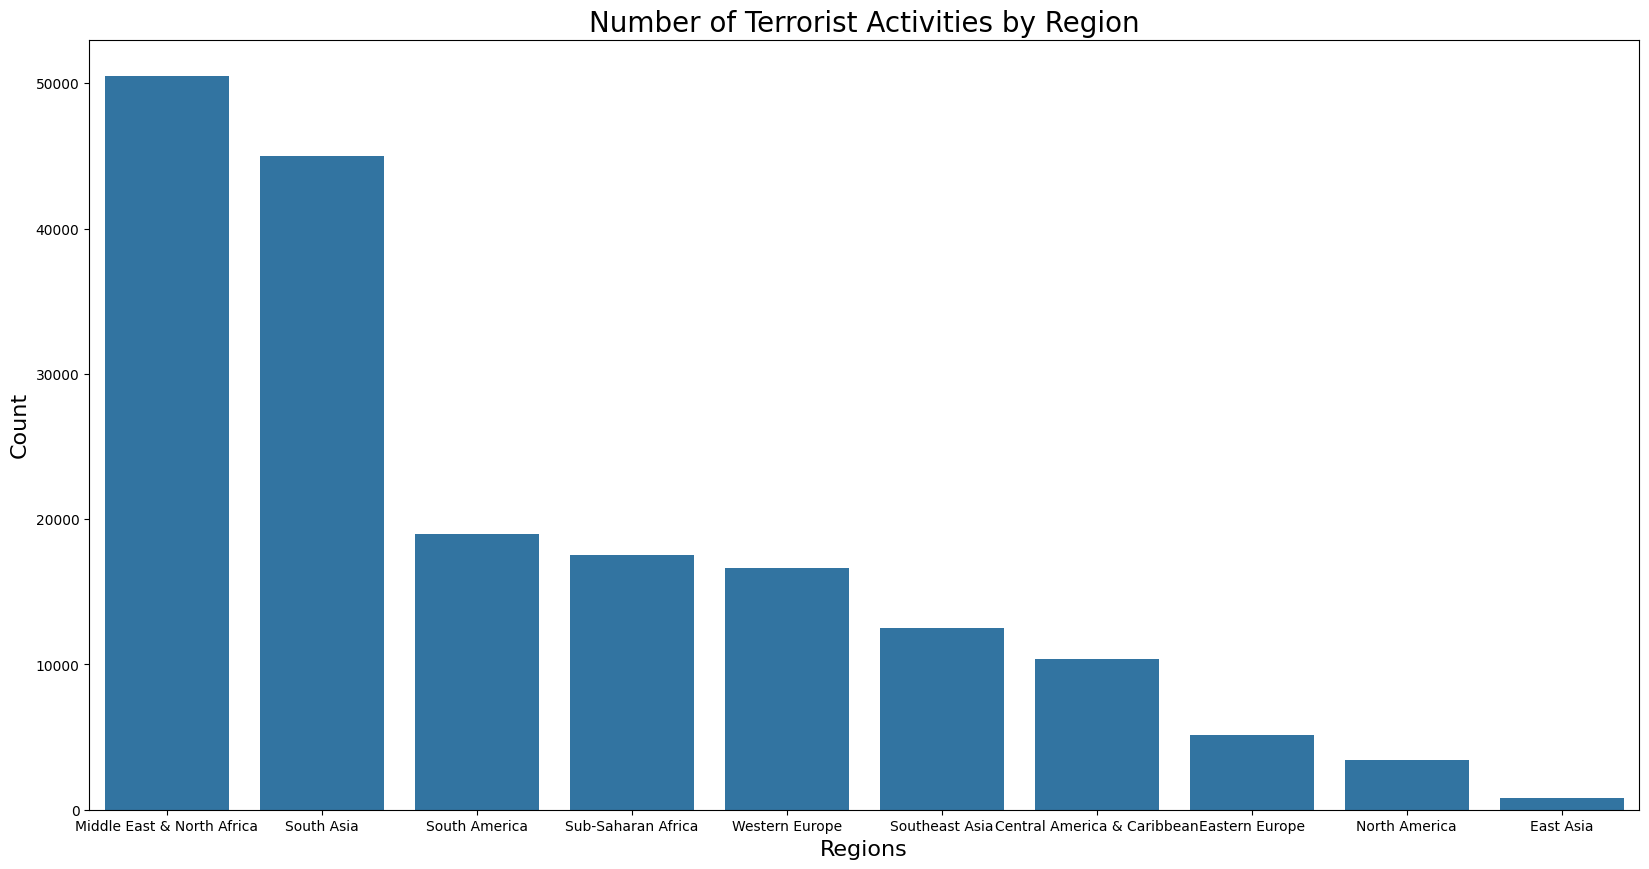

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['Region'].value_counts()[:10].index,  y = df['Region'].value_counts()[:10].values)
plt.title('Number of Terrorist Activities by Region', fontsize = 20)
plt.xlabel('Regions', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()


It is observed that terrorist activities are more frequent in Middle Eastern and North African regions, followed by South Asia, with numbers exceeding the 40000 mark. These regions can be identified as hot zones for terrorism.

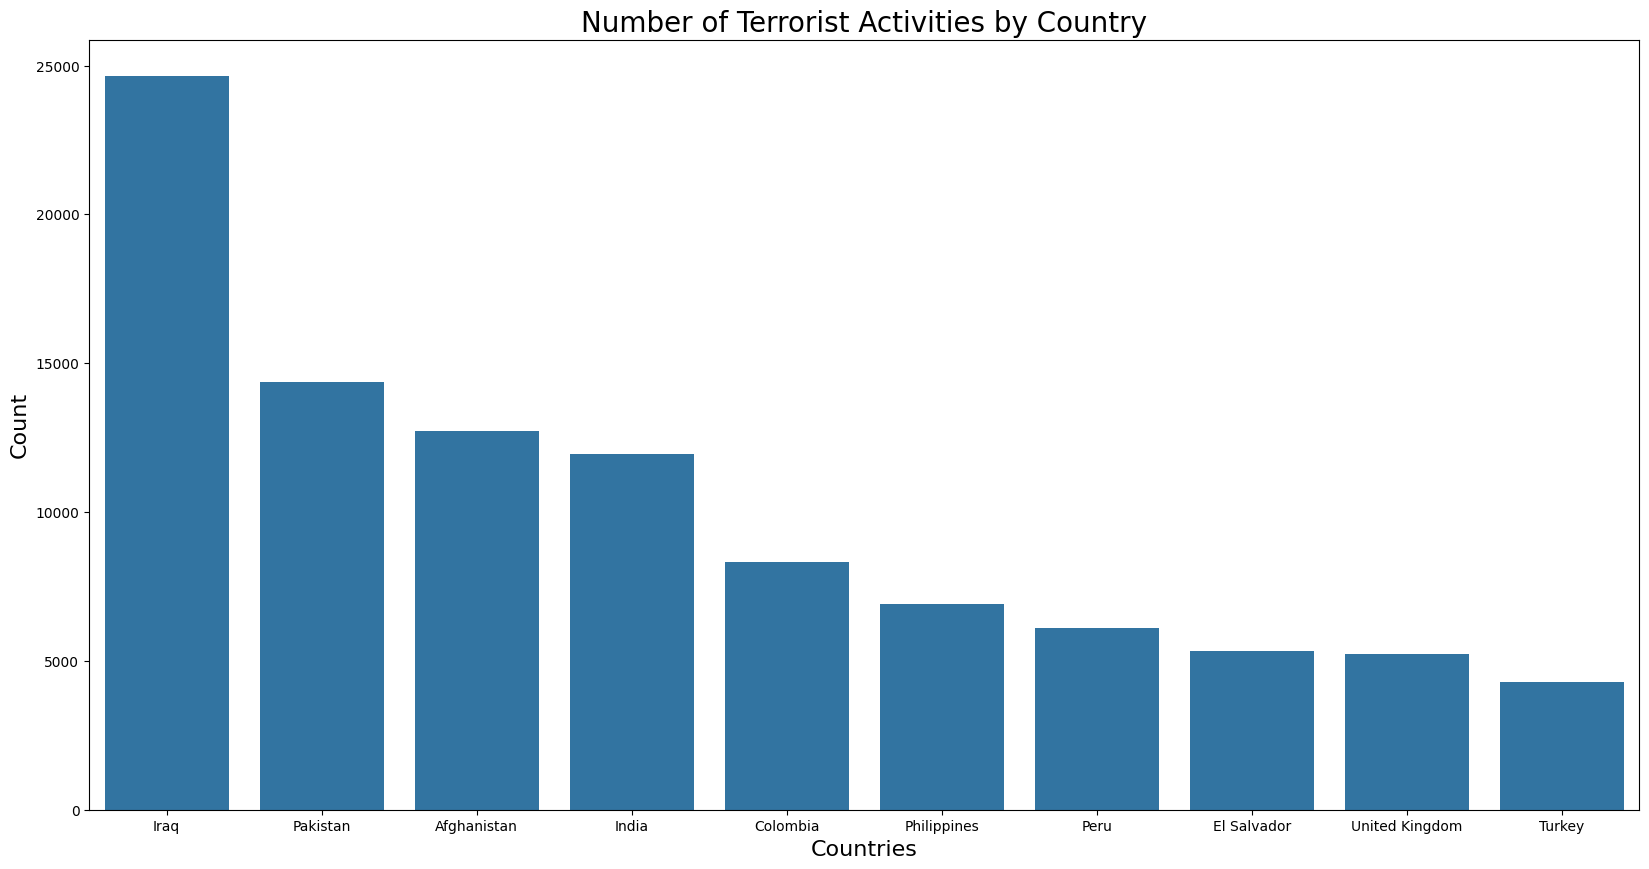

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['Country'].value_counts()[:10].index, y = df['Country'].value_counts()[:10].values)
plt.title('Number of Terrorist Activities by Country', fontsize = 20)
plt.xlabel('Countries',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.show()


It is observed that Iraq is the most prone to terrorist activities, followed by Pakistan, Afghanistan, and India, each having suffered from over 10,000 attacks in the past few decades.

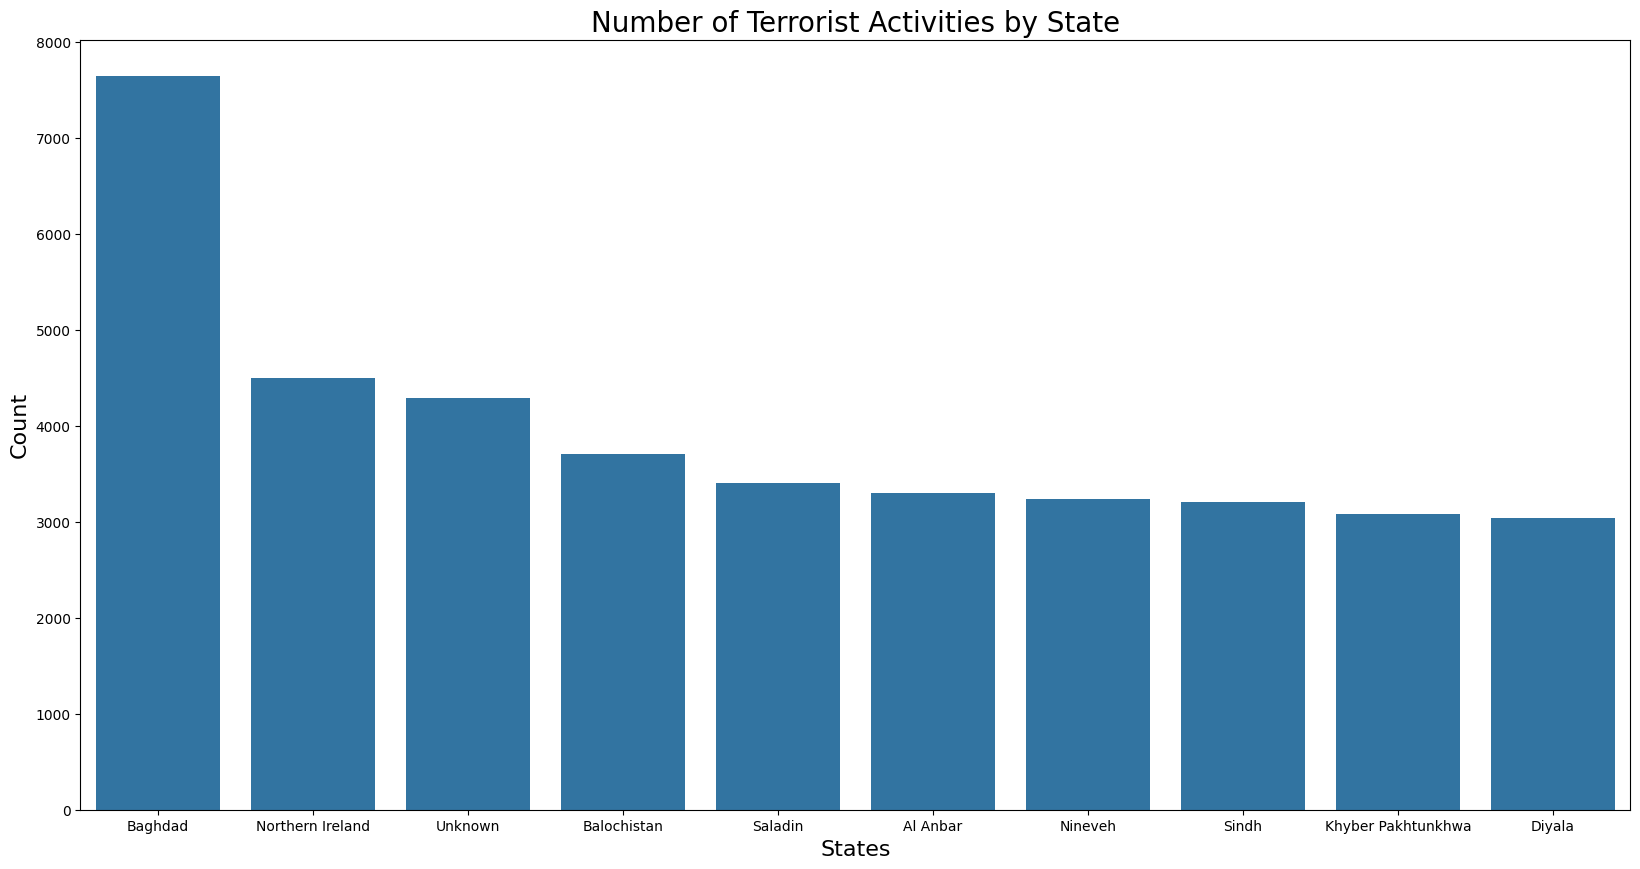

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['State'].value_counts()[:10].index, y = df['State'].value_counts()[:10].values)
plt.title('Number of Terrorist Activities by State', fontsize = 20)
plt.xlabel('States',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.show()

It is observed that Baghdad reports the highest number of terrorist activities (over 7500) among other major states and provinces of the world, with Northern Ireland following distantly.

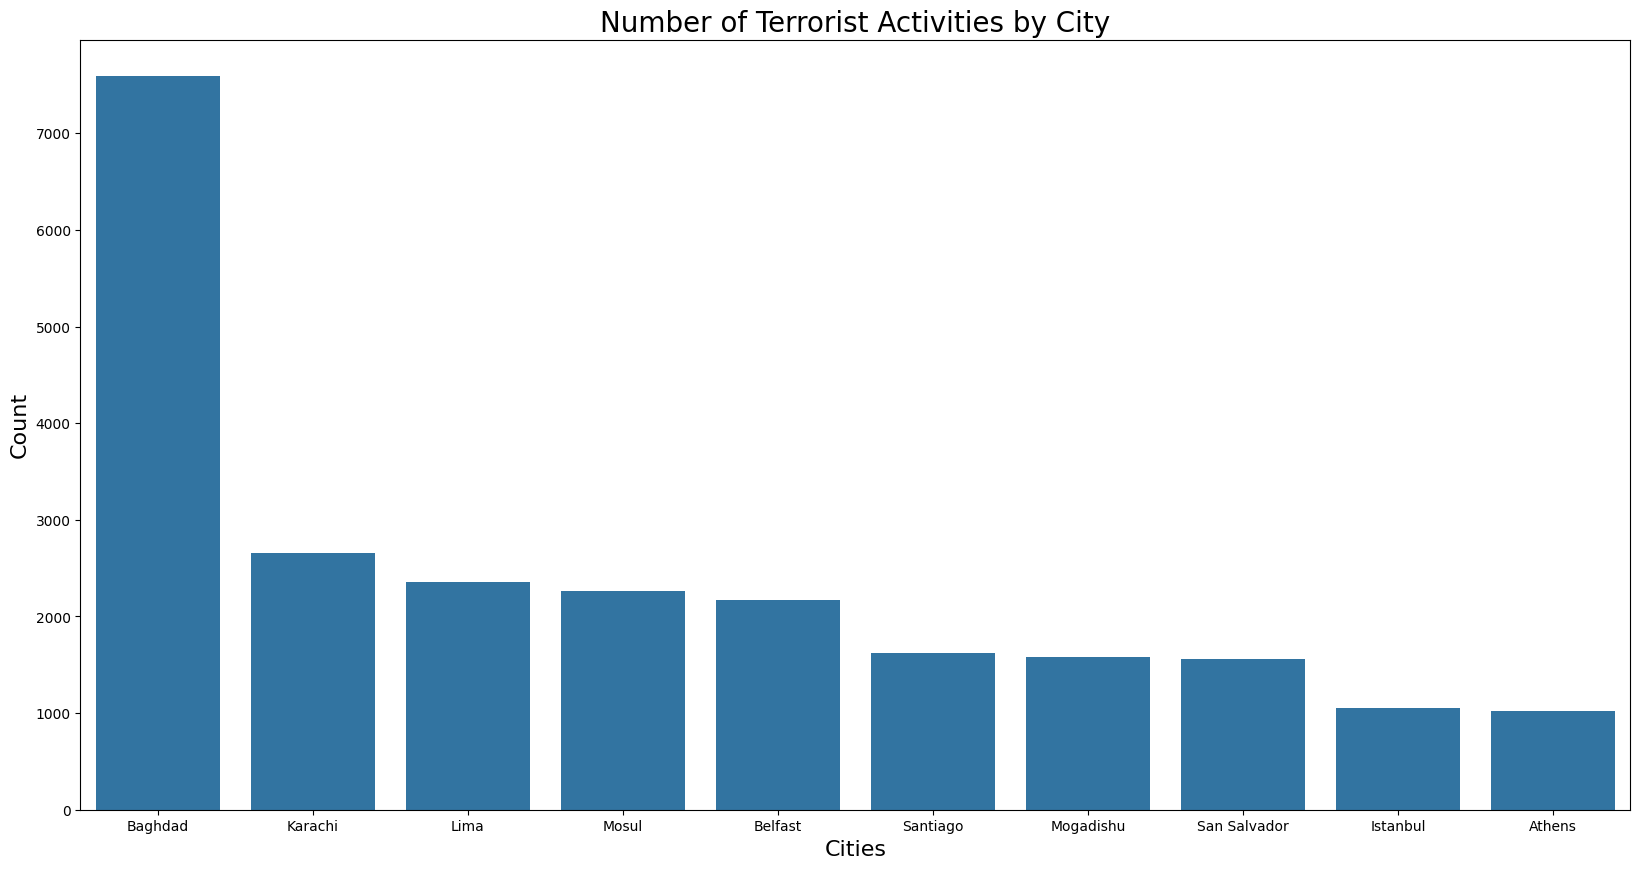

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['City'].value_counts()[1:11].index, y = df['City'].value_counts()[1:11].values)
plt.title('Number of Terrorist Activities by City', fontsize = 20)
plt.xlabel('Cities', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

It is observed that the city of Baghdad reports the highest number of terrorist activities (around 7500) among other major cities of the world, with Karachi in Pakistan following distantly.

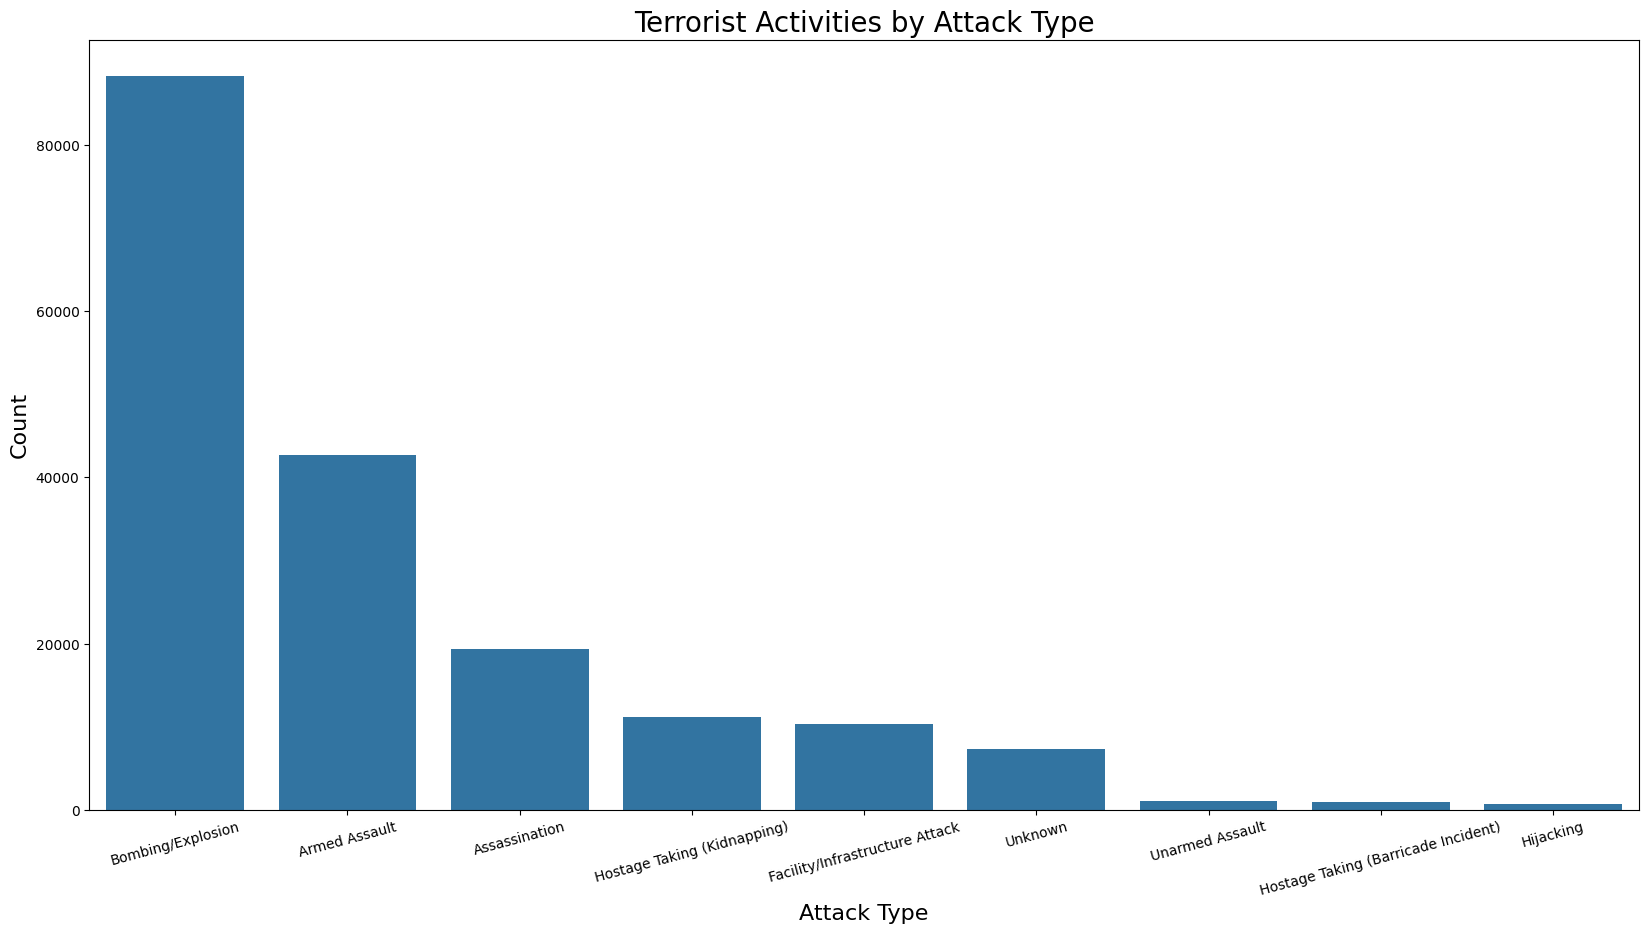

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Attack_Type', data = df, order = df['Attack_Type'].value_counts().index)
plt.xticks(rotation = 15)
plt.title('Terrorist Activities by Attack Type', fontsize = 20)
plt.xlabel('Attack Type', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

It is observed that among the primary types of terrorist attacks, bombings/explosions are the most common, followed by armed assaults and assassinations, albeit not very closely.

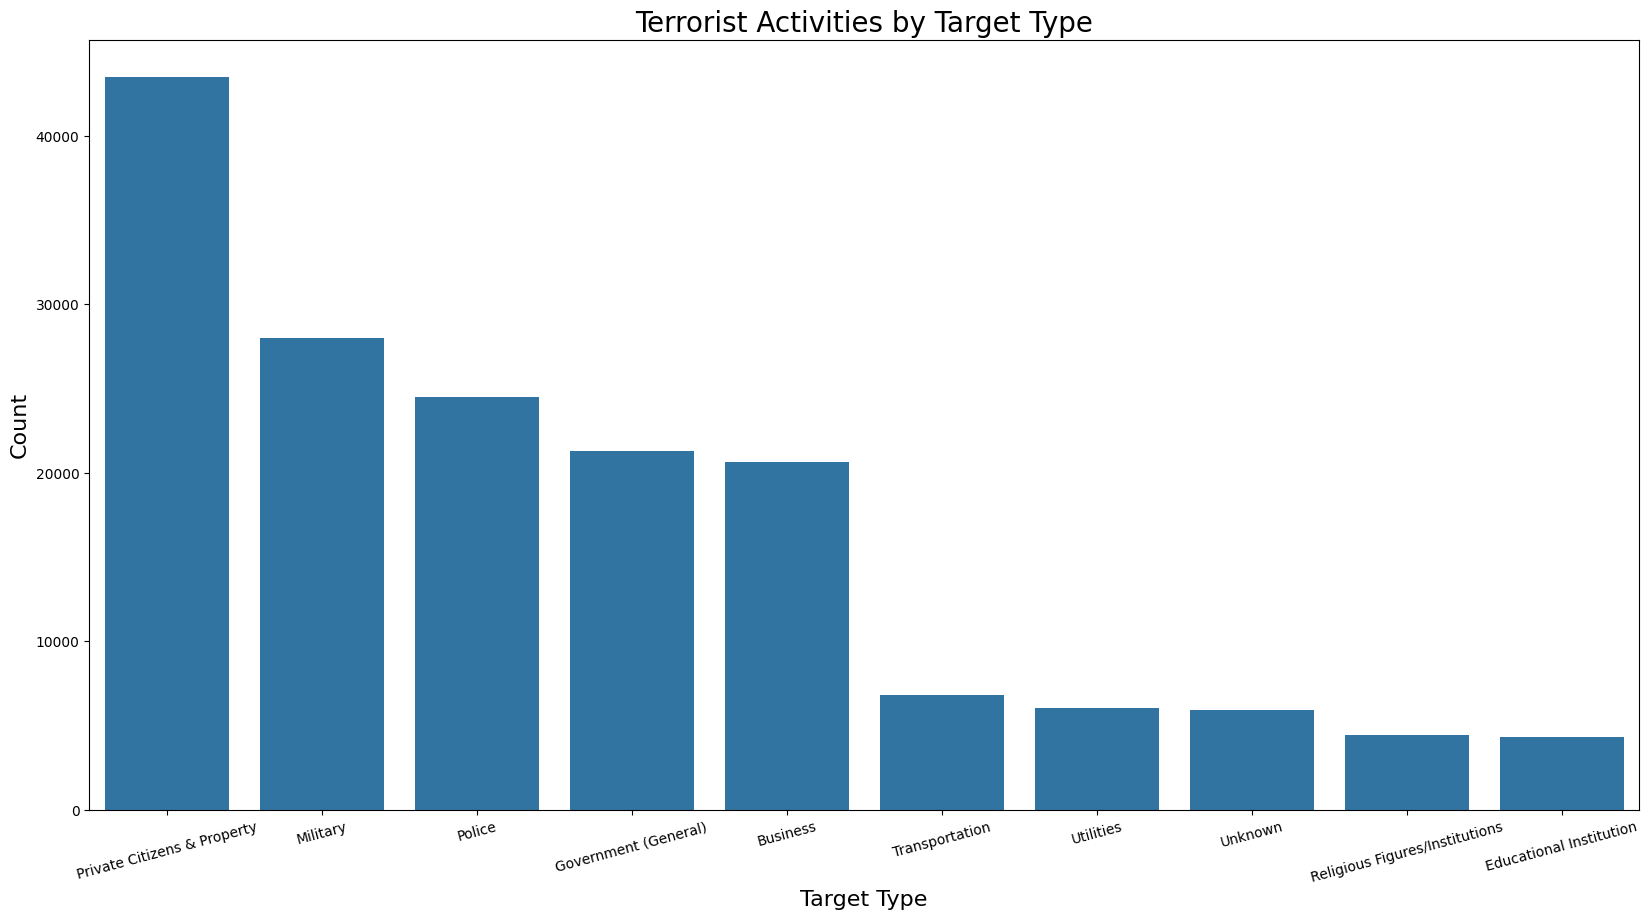

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Target_Type', data = df, order = df['Target_Type'].value_counts()[:10].index)
plt.xticks(rotation = 15)
plt.title('Terrorist Activities by Target Type', fontsize = 20)
plt.xlabel('Target Type', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

It is observed that most frequently, the targets of terrorist attacks tend to be private citizens (or civilians) and property, followed by military and police forces, as well as government and business entities.

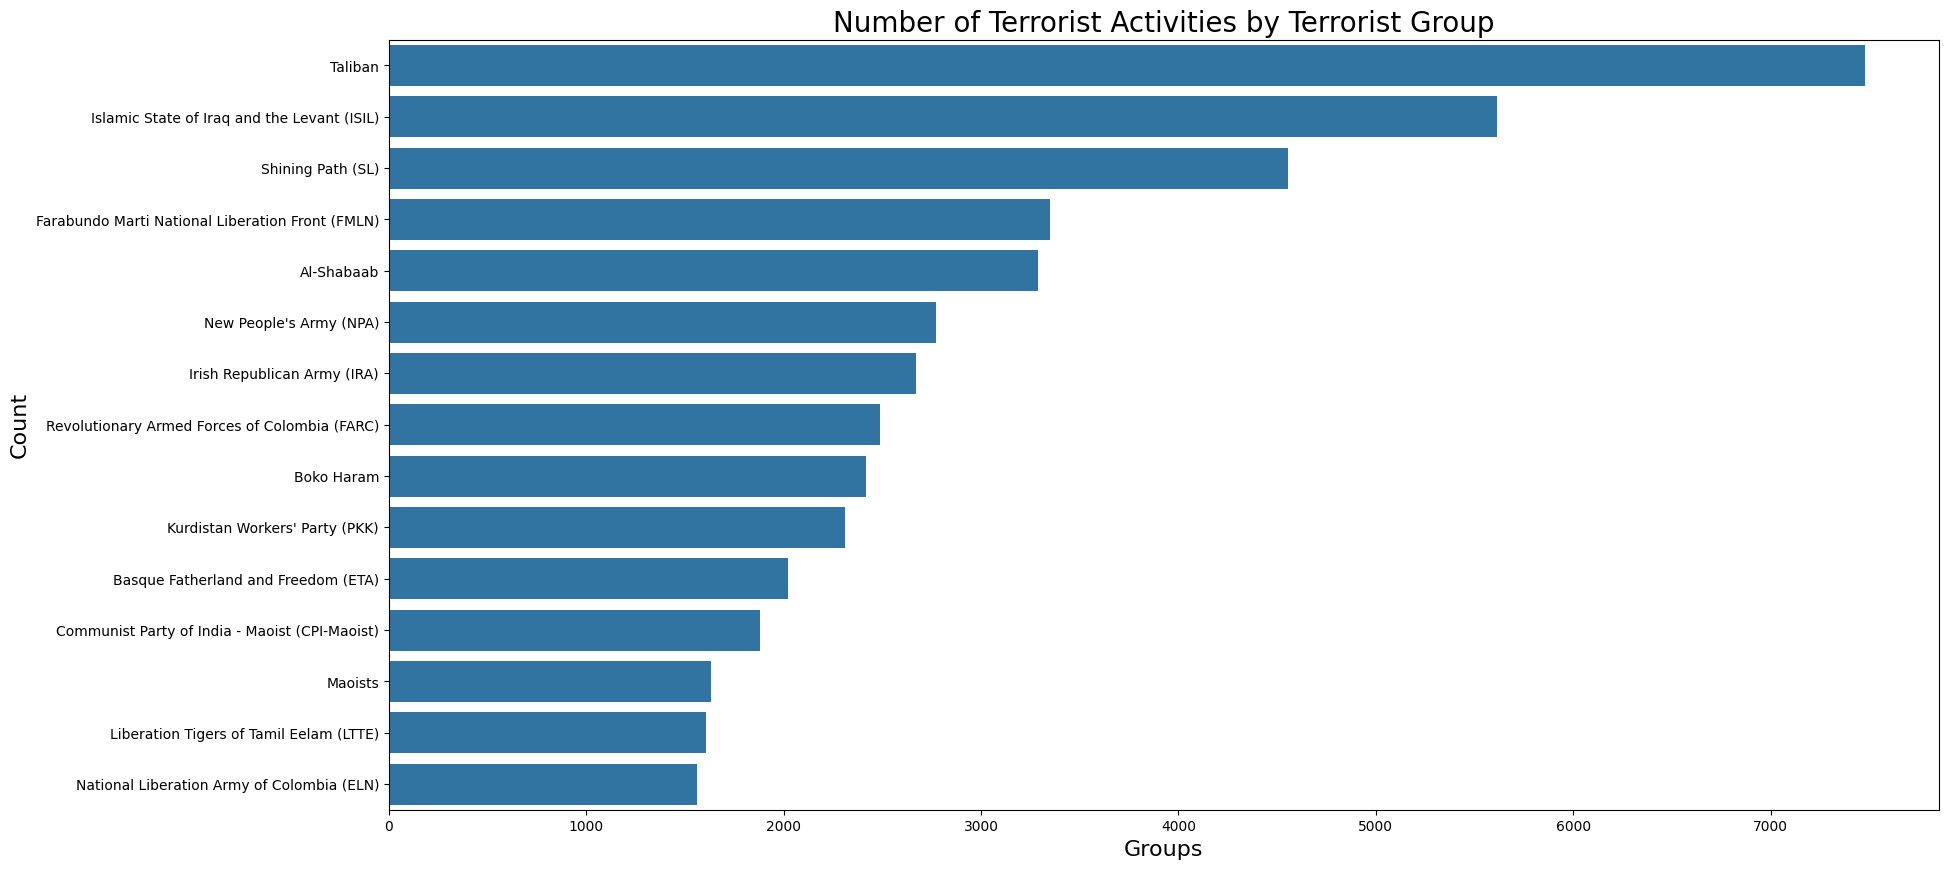

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df['Group'].value_counts()[1:16].values, y = df['Group'].value_counts()[1:16].index, orient = 'h')
plt.title('Number of Terrorist Activities by Terrorist Group', fontsize = 20)
plt.xlabel('Groups', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()


The Taliban is designated as a terrorist organization by various governments and international organizations, including the United States, the United Nations, and others.

## **Recording Casualties**

In [ ]:
data = df[['Group','Country','Killed', 'Wounded']]
data = data.groupby(['Group','Country'], axis = 0).sum().sort_values(['Killed', 'Wounded'], ascending = False).drop('Unknown').reset_index().head(10)
data

,Group,Country,Killed,Wounded
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058,23697
1,Taliban,Afghanistan,29269,27871
2,Boko Haram,Nigeria,16917,7670
3,Shining Path (SL),Peru,11595,3030
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928,10991
5,Al-Shabaab,Somalia,8176,6025
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019,4049
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883,4031
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630,728
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014,9518


The ISIL has been most actively terrorizing Iraq, with over 31,000 people killed and 23,000 wounded. The Taliban has been committing its equal share of terrorism in Afghanistan, with over 29,000 killed and 27,000 wounded.

In [ ]:
casualties_by_year = df.pivot_table(columns = 'Year', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_year

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Killed,174,173,566,370,539,617,674,456,1459,2100,...,9157,9273,7827,8246,15497,22273,44490,38853,34871,26445
Wounded,212,82,409,495,865,617,756,518,1600,2506,...,18998,19138,15947,14659,25444,37688,41128,44043,40001,24927


Most deaths due to terrorism occurred in 2014, totaling around 44,000.

In [ ]:
casualties_by_month = df.pivot_table(columns = 'Month', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_month.drop(0, axis = 1)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Killed,31320,30565,31479,34672,37310,38047,38558,38225,34485,35174,31054,30976
Wounded,35097,37030,49929,40675,45224,41370,47150,50687,58054,41599,39512,37541


Most deaths due to terrorism have occurred in the month of July, totaling around 38,000.

In [ ]:
casualties_by_day = df.pivot_table(columns = 'Day', values = ('Killed','Wounded'), aggfunc = 'sum')
casualties_by_day.drop(0, axis = 1)

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Killed,15627,12851,15145,12175,13659,12601,13362,12712,12427,14270,...,11210,13726,12824,12849,12044,12224,13565,11512,11304,6546
Wounded,19863,15883,15583,14657,16449,14580,21526,15255,17632,16717,...,14673,15936,15708,16812,14098,16294,16267,13378,14325,10301


Most deaths due to terrorism have occurred on the 11th of a month, totaling around 17,000.

In [ ]:
casualties_by_region = df.pivot_table(columns = 'Region', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_region

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Killed,150,28708,1000,1152,7415,137642,4916,28849,101319,15637,78386,6694
Wounded,260,8991,2009,9213,12045,214308,21531,16704,141360,26259,52856,18332


Most deaths due to terrorism have occurred in the Middle East and North Africa, totaling around 137,000.

In [ ]:
casualties_by_country = df.pivot_table(columns = 'Country', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_country

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154
Wounded,44277,126,9150,0,2455,0,755,71,113,126,...,27,0,3014,862,4,9328,281,211,62,222


Most deaths due to terrorism have occurred in Iraq, totaling around 78,000.

In [ ]:
casualties_by_state = df.pivot_table(columns = 'State', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_state

State,(Region) of Republican Subordination (Province),(Republic of) Ingushetia,A Coruna,Aargau,Abia,Abkhazia,Abkhazia (Autonomous Region),Abkhazia (Autonomous Republic),Abkhazia (Region),Abra,...,Zugdidi,Zulia,Zurich,khon kaen,phayao,sakon nakhon,samut prakan,saraburi,sulawesi utara,unknown
Killed,0,0,1,0,5,141,2,21,1,80,...,0,28,48,0,0,0,0,2,0,3
Wounded,0,2,0,0,7,136,0,17,15,53,...,1,17,13,0,0,0,0,0,0,4


Most deaths due to terrorism have occurred in the province of Baghdad, totaling around 21,000.

In [ ]:
casualties_by_city = df.pivot_table(columns = 'City', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_city

City,62 miles South of Dushanbe,A Coruna district,A'arbaniyeh,ANkara,Aab Kamra,Aabde,Aabdeh,Aabgarmak,Aachen,Aadaisse,...,uri,valledupar,valparaiso,vilcashuaman,villavicencio,vinchos,wakunai,yacan,yokohama,zinarag
Killed,3,3,3,0,4,2,1,1,1,0,...,3,9,0,2,2,1,0,2,0,0
Wounded,0,3,0,0,33,2,0,4,1,0,...,0,0,1,0,0,0,0,0,0,0


Most deaths due to terrorism have occurred in the city of Baghdad, numbering around 21,000.

In [ ]:
casualties_by_attack_type = df.pivot_table(columns = 'Attack_Type', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_attack_type

Attack_Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381
Wounded,77365,13887,372686,3765,17001,3966,6446,14027,14725


Most deaths due to terrorism have occurred from armed assaults, numbering around 160,000.

In [ ]:
casualties_by_target_type = df.pivot_table(columns = 'Target_Type', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_target_type

Target_Type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
Killed,10,3767,23487,3745,313,3039,26071,1501,1191,106047,...,53704,140504,13413,182,9088,758,13916,4329,1874,3617
Wounded,46,3478,54531,10227,234,10359,41184,1796,908,71038,...,64703,178671,24477,497,8223,1290,40679,3559,1353,5303


Most deaths due to terrorism have occurred among civilians and private citizens, numbering around 140,000.

In [ ]:
casualties_by_group = df.pivot_table(columns = 'Group', values = ('Killed', 'Wounded'), aggfunc = 'sum')
casualties_by_group

Group,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group,...,Zimbabwe People's Army (ZIPA),Zintani Militia,Zionist Resistance Fighters,Zomi Revolutionary Army (ZRA),Zulu Militants,Zulu Miners,Zuwar al-Imam Rida,Zviadists,Zwai Tribe,leftist guerrillas-Bolivarian militia
Killed,2,0,5,0,0,1,15,1,0,0,...,0,0,1,0,21,1,0,0,5,0
Wounded,0,0,80,0,1,32,19,0,0,1,...,0,2,0,3,100,10,0,0,0,0


Most deaths due to terrorism have been caused by the terrorist activities committed by the Islamic State of Iraq and the Levant (ISIL), numbering around 39,000.